### Load matplotlib and numpy

In [34]:
%matplotlib notebook

위의 명령어의 경우 %matplotlib inline에서 한 발 나아가서 브라우져 내에서 조작이 가능한 그림을 그릴 수 있음

In [56]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D #library for 3D-plot

### [Exercise 1] Meshgrid 및 Surface Plot을 이용한 선형함수(Linear function)의 모양 확인

$f(x,y) = ax + by + c$ 

위와 같은 형태의 모양을 가진 함수를 3차원 상의 그림 $(x , y, f(x,y))$으로 그리려고 한다.

디지털 컴퓨터는 연속적인 값을 다룰 수 없기 때문에, 이산적인(discrete) 값으로 그래프를 작성해야 된다.

따라서 $(x , y, f(x,y))$ 그리기 위해서는 살펴보고자 하는 영역을 $x, y$ 좌표로 넘겨주어야 한다.

#### $x, y$ 좌표 영역을 만들기 위해서 meshgrid라는 함수를 사용한다.

In [67]:
xExample = [1, 2, 3]
yExample = [-2, 0]
xe, ye = np.meshgrid(xExample,yExample)
print('xe', xe.shape)
print(xe)
print('ye', ye.shape)
print(ye)

('xe', (2, 3))
[[1 2 3]
 [1 2 3]]
('ye', (2, 3))
[[-2 -2 -2]
 [ 0  0  0]]


위에서 작성한 함수는 1차원의 x 좌표들(xAxisVal)과 1차원의 y 좌표들(yAxisVal)을 받아서 서로의 갯수만큼 반복해주는 함수다.

In [58]:
minVal   = -10
maxVal   = 10
stepSize = 0.1
xAxisVal = np.arange(minVal, maxVal, stepSize)
yAxisVal = np.arange(minVal, maxVal, stepSize)
xx, yy = np.meshgrid(xAxisVal, yAxisVal)

그리고 모양을 보고 싶은 함수 $f(x,y)$를 작성한다. 바로 계산을 해서 사용해도 좋지만 코드 가독성을 위해서 함수를 정의해서 사용하였다.

In [97]:
def f(x, y):
    a = 1
    b = -1
    c = 0
    return a*x + b*y + c

matshow를 이용해서 2D 행렬이 어떻게 생겼나 관찰해 볼 수 있다.

<IPython.core.display.Javascript object>


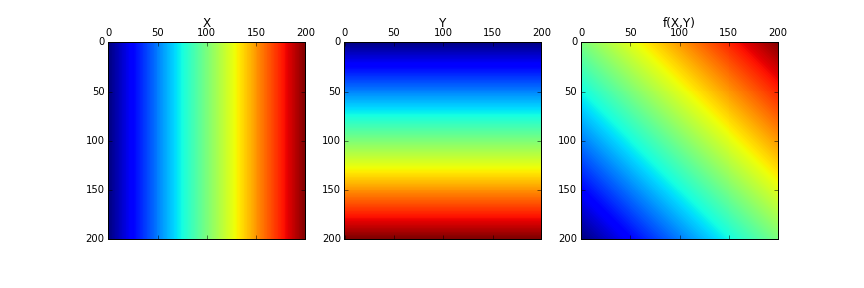

In [118]:
ff, axarr = plt.subplots(1,3, figsize=(12, 4))
axarr[0].matshow(xx)
axarr[1].matshow(yy)
axarr[2].matshow(f(xx,yy))

axarr[0].set_title('X')
axarr[1].set_title('Y')
axarr[2].set_title('f(X,Y)')

이제 plot_surface 함수를 이용해서 3D 시각화를 하는 코드다. 동일한 크기의 행렬 X,Y,Z를 넣어주고 나머지 변수들을 넣어준다.

cmap은 함수의 값을 시각화 할 때 어떤 식으로 할지 정해주는 변수다. 아래 레퍼런스를 보시고 마음에 드는 (상황에 맞는) 색을 선택하면 된다.
- http://matplotlib.org/examples/color/colormaps_reference.html

linewidth는 이름 그대로 선의 두께를 결정해주는 변수다. 값을 바꿔서 실행해보시면 차이를 확인해보자.

<IPython.core.display.Javascript object>


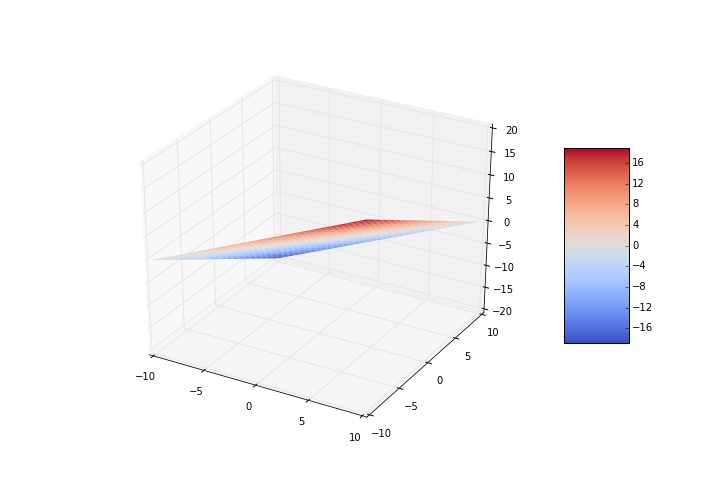

In [129]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, f(xx, yy), cmap=cm.coolwarm, linewidth=0)

fig.colorbar(surf, shrink=0.5, aspect=3)
plt.show()

### [Exercise 2] $x^2 + xy - y^2$ 함수 및 편미분의 개형 그려보기

밑의 함수를 작성 

In [121]:
# define g(x, y)
def g(x, y):
    
# define dg(x, y)/dx
def dg_dx(x, y):
    
# define dg(x, y)/dy
def dg_dy(x, y):
    
# use g(x, y) to approximate dg(x,y)/dx
def dg_dx_approx(x, y):
    
# use g(x, y) to approximate dg(x,y)/dy
def dg_dy_approx(x, y):
    

위의 함수 작성을 완료했으면 아래 코드를 실행해보자. 

<IPython.core.display.Javascript object>


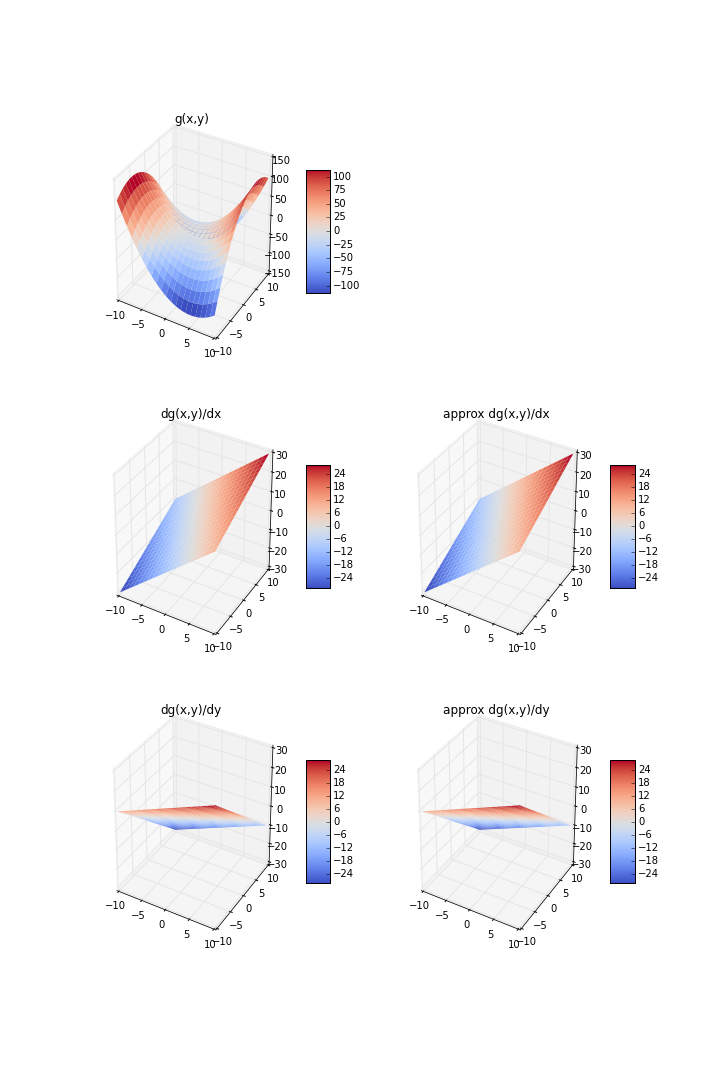

In [141]:
minVal   = -10
maxVal   = 10
stepSize = 0.1
axisVal = np.arange(minVal, maxVal, stepSize)
xx, yy = np.meshgrid(axisVal, axisVal)

fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(3, 2, 1, projection='3d')
surf = ax.plot_surface(xx, yy, g(xx, yy), cmap=cm.coolwarm, linewidth=0)
ax.set_title('g(x,y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

ax = fig.add_subplot(3, 2, 3, projection='3d')
surf = ax.plot_surface(xx, yy, dg_dx(xx, yy), cmap=cm.coolwarm, linewidth=0)
ax.set_title('dg(x,y)/dx')
fig.colorbar(surf, shrink=0.5, aspect=5)

ax = fig.add_subplot(3, 2, 4, projection='3d')
surf = ax.plot_surface(xx, yy, dg_dx_approx(xx, yy), cmap=cm.coolwarm, linewidth=0)
ax.set_title('approx dg(x,y)/dx')
fig.colorbar(surf, shrink=0.5, aspect=5)

ax = fig.add_subplot(3, 2, 5, projection='3d')
surf = ax.plot_surface(xx, yy, dg_dy(xx, yy), cmap=cm.coolwarm, linewidth=0)
ax.set_title('dg(x,y)/dy')
fig.colorbar(surf, shrink=0.5, aspect=5)

ax = fig.add_subplot(3, 2, 6, projection='3d')
surf = ax.plot_surface(xx, yy, dg_dy_approx(xx, yy), cmap=cm.coolwarm, linewidth=0)
ax.set_title('approx dg(x,y)/dy')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### [Homework/Quiz] 정규 분포 확률 밀도 함수의 모양 확인

k-차원의 다변수 정규 분포 확률 밀도 함수는 아래와 같이 주어진다.

$f(\mathbf{x}) = \frac{1}{\sqrt{(2\pi)^k det(\Sigma)}}exp\left(-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^T\Sigma(\mathbf{x}-\mathbf{\mu})\right)$

2차원의 정규 분포 확률 밀도 함수는 다음과 같다.

$f(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \frac{1}{2\pi \sqrt{(\Sigma_{11} \Sigma_{22} - \Sigma_{12} \Sigma_{21})}}$ $exp \left( -\frac{1}{2}   \begin{bmatrix}x_1 - \mu_1 & x_2 - \mu_2 \end{bmatrix} \begin{bmatrix} \Sigma_{11} & \Sigma_{12} \\ \Sigma_{21} & \Sigma_{22} \end{bmatrix} \begin{bmatrix}x_1 - \mu_1 \\ x_2 - \mu_2 \end{bmatrix} \right)$

In [ ]:
S = np.array([[1, 0], [0, 1]]) # Identity matrix
mu = np.array([[0],[0]])

def normal_dist_2d(x, y, mu, S):
    
    